# import Data
## import and install important libraries

In [1]:
from sklearn import preprocessing

In [2]:
import pandas as pd
import numpy as np
import re
import json
from os import listdir
from os.path import join
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [3]:
'''!pip uninstall nltk
!pip install nltk==3.2.5
import nltk'''

'!pip uninstall nltk\n!pip install nltk==3.2.5\nimport nltk'

In [4]:
import emoji#checking if a character is an emoji
import re
import nltk
from nltk.corpus import wordnet
from nltk import word_tokenize 
from nltk.corpus import stopwords 
from nltk import sent_tokenize, word_tokenize
import time

In [5]:
folder=f'/Users/livi/Documents/2020 Fall/data mining/Proposal/Final Paper/Tweets_Half_Cleaned/'
FinFolder=os.listdir(folder)
Frame=[]
for file in FinFolder[:]:
    if (file.endswith('.csv')) & (file!='.DS_Store'):
        One_Frame=pd.read_csv(join(folder,file),lineterminator='\n',index_col=0)
        Frame.append(One_Frame)
        print(file)
T=pd.concat(Frame)

Testtweets20201030_1550_Cleaned.csv
Testtweets20201023_450_Cleaned.csv
Testtweets20201213_1533_Cleaned.csv
Testtweets2020128_2235_Cleaned.csv
Testtweets2020129_43_Cleaned.csv
Testtweets2020128_194_Cleaned.csv
Testtweets20201117_1937_Cleaned.csv
Testtweets2020124_159_Cleaned.csv
Testtweets20201218_224_Cleaned.csv
Testtweets20201115_1554_Cleaned.csv
Testtweets20201028_1546_Cleaned.csv
Testtweets20201112_1714_Cleaned.csv
Testtweets2020121_1825_Cleaned.csv
Testtweets2020127_1537_Cleaned.csv
Testtweets2020129_1521_Cleaned.csv
Testtweets20201031_1933_Cleaned.csv
Testtweets2020128_2232_Cleaned.csv
Testtweets20201124_130_Cleaned.csv
Testtweets20201023_1913_Cleaned.csv
Testtweets20201029_1434_Cleaned.csv
Testtweets20201120_1941_Cleaned.csv
Testtweets20201119_2141_Cleaned.csv


# Data Cleaning

### Generate user information

### Detect Bot and Consider label Bot
1. interarrival time is smaller than 5 seconds(Tested, mainly small intervals are caused by long tweets)
2. other weird resource (source from bot may have interarrival time much longer 5 sec) Most effective method

number of Influencer:A micro-influencer is someone who has between 1,000 to 100,000 followers

In [6]:
T['source']=T['source'].astype('str')
T['source']=T['source'].str.lower()
T['source']=T['source'].str.findall('>([^<]+?)<').apply(lambda x:x[0] if len(x)>=1 else '')

In [7]:
#Assign user type
T['UserType']=''
screen_name_of_bots=list(T[T['source'].str.contains('bot')]['screen_name'].unique())
BFF=T[['screen_name','friends_count','followers_count']].groupby(['screen_name']).last().reset_index()
#assign influencer
screen_name_of_influencer=BFF[(BFF['followers_count']>1000)]['screen_name']
T.loc[(T['screen_name'].isin(screen_name_of_influencer)) & (~ T['screen_name'].isin(screen_name_of_bots)),'UserType']='influencer'
#assign influencer
screen_name_of_user=BFF[(BFF['followers_count']<=1000)]['screen_name']
T.loc[(T['screen_name'].isin(screen_name_of_user))& (~ T['screen_name'].isin(screen_name_of_bots)),'UserType']='user'
#assign bots
T.loc[T['screen_name'].isin(screen_name_of_bots),'UserType']='bot'

###  Generate labels topic

In [8]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
'''PopSDGs=['SDG'+str(i) for i in [4,5,7,2,16]]
for PopSDG in PopSDGs:
  searchTerm = PopSDG
  TextExt=T[[searchTerm in x for x in T['SDG']]]
  #parameter set-up
  count_vect=CountVectorizer(max_df=0.8,min_df=2,stop_words='english')
  LDA = LatentDirichletAllocation(n_components=5, random_state=42)
  #topic modeling
  tweet_matrix=count_vect.fit_transform(TextExt['extended_tweet_lemmatized'].values.astype('U'))
  LDA.fit(tweet_matrix)
  #print results
  '''  for i in top_topic_words:
      print(count_vect.get_feature_names()[i])'''
  for i,topic in enumerate(LDA.components_):
      print(f'Top 20 words for {PopSDG} topic #{i}:')
      print([count_vect.get_feature_names()[i] for i in topic.argsort()[-20:]])
      print('\n')
  print('*'*50)
  #put topic back to tweets
  topic_values = LDA.transform(tweet_matrix)
  T[PopSDG+'Topic']=None
  #putinto the main matrix
  T.loc[TextExt.index,PopSDG+'Topic']=topic_values.argmax(axis=1)'''

SyntaxError: invalid syntax (<ipython-input-9-211036dee33c>, line 12)

# Analysis

## Generate different type of users

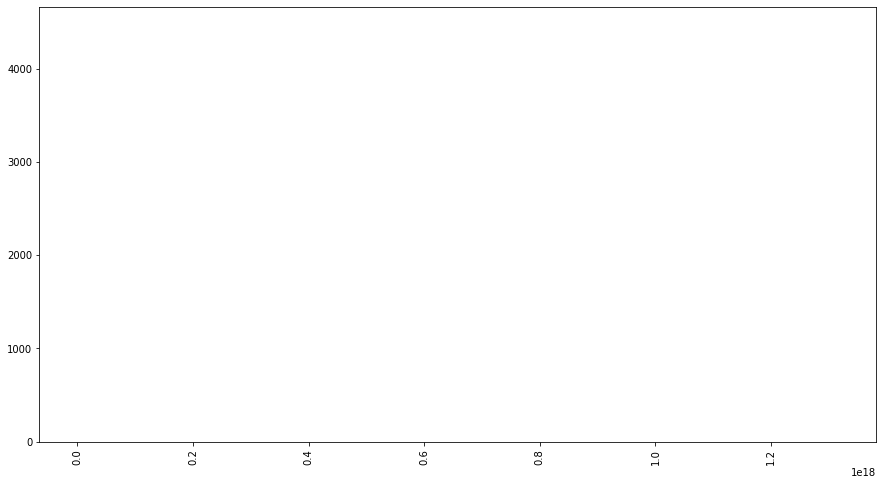

In [14]:
names=Counter(T.id.tolist())
SDG={k:v for k,v in sorted(names.items(),key=lambda x: x[1], reverse=True)}
#plot by id
plt.figure(figsize=(15,8))
plt.bar(list(SDG.keys())[:30],list(SDG.values())[:30])
plt.xticks(rotation=90)
plt.show()

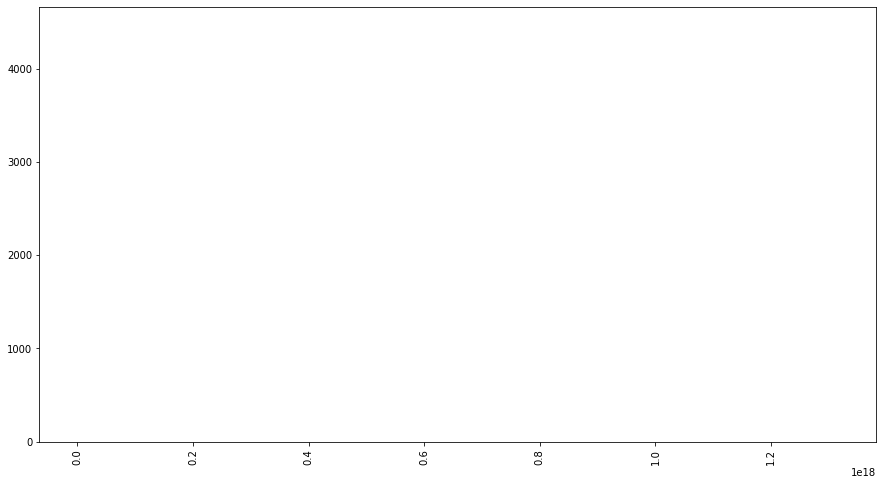

AttributeError: 'int' object has no attribute 'split'

In [12]:



#Screen name based on id
SDG_ScreenName=[]
SDG_ScreenName_count=[]
for i in range(30):
    needed=list(SDG.keys())[i].split('+')[0]
    SDG_ScreenName.append(T[T.id.str.contains(needed)].screen_name.unique()[0])
    SDG_ScreenName_count.append(SDG[list(SDG.keys())[i]])
    #print(Name,':',SDG[list(SDG.keys())[i]])
#important to get variable SDG
plt.figure(figsize=(15,8))
plt.bar(SDG_ScreenName,SDG_ScreenName_count)
plt.xticks(rotation=90)
plt.show()

In [ ]:
names=Counter(T['id'])
SDG={k:v for k,v in sorted(names.items(),key=lambda x: x[1], reverse=True)}
T['type']=['org' if SDG[i]>100 else 'user' if SDG[i]<2 else 'activist' for i in T['id']]
T.head()

### Differentiate User and Org

In [ ]:
#important to get variable SDG
SDG_ScreenName_dict=T[T['id'].isin(list(SDG.keys())[:30])].drop_duplicates(subset=['id'],keep='last')[['id','screen_name']].set_index('id').to_dict()
SDG_ScreenName=[SDG_ScreenName_dict['screen_name'][i] for i in list(SDG.keys())[:30]]
plt.figure(figsize=(15,8))
plt.bar(SDG_ScreenName,list(SDG.values())[:30])
plt.xticks(rotation=90)
plt.show()

### Generate National Graph

In [ ]:
####import libraty and geojson

In [ ]:
import folium

In [ ]:
with open('/s3/Tweets files/countries.geojson') as f:
  geodata = json.load(f)

In [ ]:
holdlist=[]
allcountries=[]
for k,i in enumerate(geodata['features']):
  allcountries.append(i['properties']['ADMIN'])
  if i['properties']['ADMIN'] in T['CountryCode'].tolist():
    holdlist.append(i['properties']['ADMIN'])

In [ ]:
print(len(np.unique(np.array(holdlist))))
print(len(T['CountryCode'].unique()))
print(len(np.unique(allcountries)))
df1=pd.DataFrame(allcountries)
df1.index=df1[0]
df1.columns=['geojson']
df2=pd.DataFrame(T['CountryCode'].unique())
df2.index=df2[0]
df2.columns=['googlemap']

In [ ]:
contriesLists=pd.concat([df1, df2], axis=1, sort=False,join='outer')
D=contriesLists[contriesLists['googlemap']!=contriesLists['geojson']]

In [ ]:
#{'Geo':sorted(D[pd.isnull(D['googlemap'])]['geojson'].astype('str').tolist()),'GMp':sorted(D[pd.isnull(D['geojson'])]['googlemap'].astype('str').tolist())}

In [ ]:
#### Plot Frequency Map and sccatter plot

In [ ]:
PP=T[['CountryCode', 'text']].groupby('CountryCode').count()
PP.reset_index(inplace=True)
PP.sort_values('text',ascending=False,inplace=True)

In [ ]:
PP['count']=np.log10(PP['text'])

In [ ]:
m = folium.Map(location=[0, 0], zoom_start=2)
folium.Choropleth(
    geo_data=geodata,
    name='choropleth',
    data=PP,
    columns=['CountryCode', 'count'],
    key_on='feature.properties.ADMIN',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='# of Tweets'
).add_to(m)

folium.LayerControl().add_to(m)
m

In [ ]:
plt.figure(figsize=(20,10))
#plt.bar(PP.CountryCode[:30],PP.text[:30])
plt.scatter(range(len(PP.CountryCode)),PP['count'])
plt.xlabel('Country',fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('log_10 Frequency',fontsize=20)
plt.tight_layout()
#plt.savefig('1023place dis.jpg')
plt.show()

plt.figure(figsize=(20,10))
plt.bar(PP.CountryCode[:30],PP.text[:30])
plt.xlabel('Country',fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=20)
plt.tight_layout()
#plt.savefig('1023place dis.jpg')
plt.show()

In [ ]:
#### plot SDG Map and heatmap table 


In [ ]:
#Country and SDG distribution
CS=T[['CountryCode','SDG']]
SDs={}
for coun in CS['CountryCode'].unique():
    SDs[coun]={'SDG'+str(i+1):0 for i in range(17)}
    temp=CS[CS['CountryCode']==coun]['SDG']
    for S in temp:
        for SS in S:
            try:
              SDs[coun][SS]+=1
            except:
                pass  

In [ ]:
selected_country=['United States','United Kingdom','Australia','India','Nigeria','Kenya']
SD_Coun_HM=pd.DataFrame({i:SDs[i] for i in selected_country})
rowname,colname=SD_Coun_HM.columns,SD_Coun_HM.index
#prepare label
HM_label=SD_Coun_HM.div(SD_Coun_HM.sum(axis=0),axis=1).T.values
#prepare data
SD_Coun_HM=pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(SD_Coun_HM).T)
SD_Coun_HM.index,SD_Coun_HM.columns=rowname,colname
#plt
plt.figure(figsize=(20,4))
axhm = plt.gca()
axhm.xaxis.set_ticks_position('top')
cmp=sns.color_palette("Blues", as_cmap=True)
sns.heatmap(SD_Coun_HM,cmap=cmp,vmax=1.2,linewidths=1,annot=HM_label,fmt='.2%',cbar=False,annot_kws={"fontsize":13})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
#Color of each SDG
Colors=['#e4253c','#dea73a','#4c9f45','#c5202e','#f0412b','#29bee2','#fac315','#a21c44','#f26a2c','#dd1768','#f99d27','#be8b2c','#417f45','#1c97d3','#5dbb47','#06699e','#18486b']
SDGcolor={'SDG'+str(i+1):Colors[i] for i in range(17)}

#statistic of some selected countries
EsC_count={}
for i in SDs.keys():
    if i==i and i not in ["['SDG14']","[]"]:
        try:
            EsC_count[i]={'sum':0,'top':0,'percentage':0}
            EsC_count[i]['sum']=sum(SDs[i].values())
            if EsC_count[i]['sum']!=0:
                EsC_count[i]['percentage']=round(max(SDs[i].values())/sum(SDs[i].values())*100,1)
            else:
                EsC_count[i]['percentage']=0
            EsC_count[i]['top']=max(SDs[i].items(),key=lambda x: x[1])[0]
            EsC_count[i]['bottom']=min(SDs[i].items(),key=lambda x: x[1])[0]
            #EsC_count[i]['geo']=[geodict[i]['lat'],geodict[i]['lng']]
        except:
            raise

#select some countries
ggdataEsC=geodata
select=[]
for i in range(len(ggdataEsC['features'])):
    if ggdataEsC['features'][i]['properties']['ADMIN'] in EsC_count.keys():
        select.append(i)
ggdataEsC['features']=[ggdataEsC['features'][i] for i in select]



In [ ]:
#plot the graph most popular
def stfunc(features):
    return {'fillOpacity': 0.9,'weight': 0,'fillColor':SDGcolor[EsC_count[features['properties']['ADMIN']]['top']]}
def gengeo(coun):
    f={'features':[ggdataEsC['features'][i]] for i in range(len(ggdataEsC['features'])) if ggdataEsC['features'][i]['properties']['ADMIN']==coun}
    f['type']='FeatureCollection'
    return f

n = folium.Map(location=[50, 10], zoom_start=2.2,tiles='OpenStreetMap')
folium.GeoJson(ggdataEsC,name='United States',style_function=stfunc).add_to(n)
n

In [ ]:
#plot the graph least popular sdg
def stfunc(features):
    return {'fillOpacity': 0.9,'weight': 0,'fillColor':SDGcolor[EsC_count[features['properties']['ADMIN']]['bottom']]}
def gengeo(coun):
    f={'features':[ggdataEsC['features'][i]] for i in range(len(ggdataEsC['features'])) if ggdataEsC['features'][i]['properties']['ADMIN']==coun}
    f['type']='FeatureCollection'
    return f

o = folium.Map(location=[50, 10], zoom_start=2.2,tiles='OpenStreetMap')
folium.GeoJson(ggdataEsC,name='United States',style_function=stfunc).add_to(o)
o

#T.to_csv('T with location.csv')

In [ ]:
#### Developing and Developed Country Compare (vote the top then select)
#define developed country and developing country
developed_country='Canada,United States,Australia,Japan,New Zealand,Austria,Belgium,Denmark,Finland,France,Germany,Greece,Ireland,Italy,Luxembourg,Netherlands,Portugal,Spain,Sweden,United Kingdom,Bulgaria,Croatia,Cyprus,Czechia,Estonia,Hungary,Latvia,Lithuania,Malta,Poland,Romania,Slovakia,Slovenia,Iceland,Norway,Switzerland'.split(',')
transition='Albania,Bosnia and Herzegovina,Montenegro,North Macedonia,Serbia,Armenia,Azerbaijan,Belarus,Georgia,Kazakhstan,Kyrgyzstan,Moldova,Russia,Tajikistan,Turkmenistan,Ukraine,Uzbekistan'.split(',')
developing_country='Algeria,Egypt,Libya,Mauritania,Morocco,Sudan,Tunisia,Cameroon,Central African Republic,Chad,Republic of the Congo,Equatorial Guinea,Gabon,São Tomé and Príncipe,Burundi,Comoros,Democratic Republic of the Congo,Djibouti,Eritrea,Ethiopia,Kenya,Madagascar,Rwanda,Somalia,South Sudan,Uganda,Tanzania,Angola,Botswana,Eswatini,Lesotho,Malawi,Mauritius,Mozambique,Namibia,South Africa,Zambia,Zimbabwe,Benin,Burkina Faso,Cape Verde,Côte d\'Ivoire,The Gambia,Ghana,Guinea,Guinea-Bissau,Liberia,Mali,Niger,Nigeria,Senegal,Sierra Leone,Togo,Brunei,Cambodia,China,North Korea,Fiji,Hong Kong,Indonesia,Kiribati,Laos,Malaysia,Mongolia,Myanmar (Burma),Papua New Guinea,Philippines,South Korea,Samoa,Singapore,Solomon Islands,Taiwan,Thailand,Timor-Leste,Vanuatu,Vietnam,Afghanistan,Bangladesh,Bhutan,India,Iran,Maldives,Nepal,Pakistan,Sri Lanka,Bahrain,Iraq,Israel,Jordan,Kuwait,Lebanon,Oman,Qatar,Saudi Arabia,Palestine,Syria,Turkey,United Arab Emirates,Yemen,The Bahamas,Barbados,Belize,Guyana,Jamaica,Suriname,Trinidad and Tobago,Costa Rica,Cuba,Dominican Republic,El Salvador,Guatemala,Haiti,Honduras,Mexico,Nicaragua,Panama,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela'.split(',')



In [ ]:
##### vote the top then select

In [ ]:
def talkmost(country,T):
  for i in list(set(country)-set(SDs.keys())):
    country.remove(i)
  country_SDs={i:SDs[i]for i in country}
  country_TopSDG=[]
  for i in country_SDs:
    try:
      if sum(country_SDs[i].values())>20 & max(country_SDs[i].values())>1:#make sure more than 1 tweets in the max column
        MAXtop=max(country_SDs[i].values())
        country_TopSDG.extend([ii for ii in country_SDs[i] if country_SDs[i][ii]==MAXtop])    
    except:
      pass
  country_TopSDG={k:v for k,v in sorted(Counter(country_TopSDG).items(),key=lambda x:x[1],reverse=True)}
  plt.bar(country_TopSDG.keys(),country_TopSDG.values())
  plt.title(T)
  print(list(country_TopSDG.keys()))
  plt.show()

def talkleast(country,T):
  for i in list(set(country)-set(SDs.keys())):
    country.remove(i)
  country_SDs={i:SDs[i]for i in country}
  country_TopSDG=[]
  for i in country_SDs:
    try:
      if sum(country_SDs[i].values())>20:#make sure more than 1 tweets in the max column
        MINtop=min(country_SDs[i].values())
        country_TopSDG.extend([ii for ii in country_SDs[i] if country_SDs[i][ii]==MINtop])
        #print(MINtop)
    except:
      pass
  country_TopSDG={k:v for k,v in sorted(Counter(country_TopSDG).items(),key=lambda x:x[1],reverse=True)}
  plt.bar(country_TopSDG.keys(),country_TopSDG.values())
  plt.title(T)
  print(list(country_TopSDG.keys()))
  plt.show()

plt.figure(figsize=(15,5))
talkmost(developed_country,'Developed talk Most')
plt.figure(figsize=(15,5))
talkleast(developed_country,'Developed talk Least')
plt.figure(figsize=(15,5))
talkmost(developing_country,'developing talk Most')
plt.figure(figsize=(15,5))
talkleast(developing_country,'developing talk Least')
plt.figure(figsize=(15,5))
talkmost(transition,'Transition talk Most')
plt.figure(figsize=(15,5))
talkleast(transition,'Transition talk Least')



In [ ]:
##### Based on Frequency

In [ ]:
def toptalkfreq(countrylist,T):
  SD_Co=pd.DataFrame({i:SDs[i] for i in countrylist})
  SD_Co.sum(axis=1).sort_values(ascending=False).plot(kind='bar')
  l=list(SD_Co.sum(axis=1).sort_values(ascending=False).index)
  #l = [i.strip('\'\'') for i in l]
  print(l)

  plt.title(T)
  plt.show()

plt.figure(figsize=(10,5))
toptalkfreq(developed_country,'Developed Countries')
plt.figure(figsize=(10,5))
toptalkfreq(developing_country,'Developing Countries')

In [ ]:
### Top SDG based on Country

In [ ]:
#TextTweets=pd.read_csv('/s3/Tweets files/TextTweets 11 columns.csv')

top5EnCoun=PP.CountryCode[:30].tolist()
for topcount in top5EnCoun:
  plt.figure(figsize=(14,7))
  plt.bar(SDs[topcount].keys(),SDs[topcount].values())
  plt.title(topcount,fontsize=25,weight='bold')
  plt.xlabel('SDG',fontsize=25,weight='bold')
  plt.xticks(fontsize=20,weight='bold',rotation=90)
  plt.yticks(fontsize=20,weight='bold',rotation=90)
  plt.ylabel('Frequency',fontsize=25,weight='bold')
  plt.tight_layout()
  #plt.savefig(topcount+'.jpg')
  plt.show()

In [ ]:

### Frequency of SDG

In [ ]:
TT=T[['extended_tweet', 'SDG','CountryCode']]
TT['length']=[len(i) for i in TT['SDG']]
TT=TT[[len(i)>0 for i in TT['SDG']]]
TT.reset_index(drop=True,inplace=True)
print(TT.shape)
TT.head()

In [ ]:
#TT.to_csv('TT 3 columns.csv')
#T.to_csv('T with loc and extendedtweet.csv')

In [ ]:
#Clean up the string
Tdict={}
for i in TT['SDG'].to_list():
    for ii in i:
        if ii in Tdict:
            Tdict[ii]+=1
        else:
            Tdict[ii]=1

#Tdict['']+=Tdict['']
try:
  Tdict['SDG1']+=Tdict['SDG01']
  Tdict['SDG8']+=Tdict['SDG08']
  Tdict['SDG6']+=Tdict['SDG64']
  Tdict['SDG4']+=Tdict['SDG04']
  del Tdict['SDG01']
  del Tdict['SDG04']
  #del Tdict['SDG4ALL']
  #del Tdict['SDG4B']
  #del Tdict['SDG4IT']
  #del Tdict['SDG4SURVEY']
  #del Tdict['SDG4PT7']
  del Tdict['SDG64']
  del Tdict['SDG08']
  del Tdict['SDG18']
  del Tdict['SDG200']
  del Tdict['SDG2030']
  del Tdict['SDG2020']
except:
  pass
Tdict={k:v for k,v in sorted(Tdict.items(), key=lambda x: x[1],reverse=True)}
Tdict

print(Tdict.keys())
plt.figure(figsize=(20,10))
plt.bar(Tdict.keys(),Tdict.values())
plt.xlabel('SDG',fontsize=25,weight='bold')
plt.xticks(fontsize=20,weight='bold',rotation=90)
plt.yticks(fontsize=20,weight='bold',rotation=90)
plt.ylabel('Frequency',fontsize=25,weight='bold')
plt.tight_layout()
#plt.savefig('SDG popularity.jpg')
plt.show()

### Sentiment analysis

In [ ]:
#### Sentiment on user, activist, and org

In [ ]:
T[T['CountryCode'].isin(['United States','United Kingdom','Australia','Nigeria'])].groupby(['CountryCode','type']).apply(lambda x: len(set(x['id'])))

In [ ]:
#generate number of organization, activists and user
T[T['CountryCode'].isin(['United States','United Kingdom','Australia','Nigeria'])].groupby(['CountryCode','type']).apply(lambda x: len(set(x['id'])))

In [ ]:
Sentiment_Type_Country=T[T['CountryCode'].isin(['United States','United Kingdom','Australia','Nigeria'])].groupby(['CountryCode','type']).describe()
Sentiment_Type_Country['compound']

Sentiment_Type_Country_unique=T[T['CountryCode'].isin(['United States','United Kingdom','Australia','Nigeria'])].drop_duplicates(subset='extended_tweet').groupby(['CountryCode','type']).describe()
Sentiment_Type_Country_unique['compound']

In [ ]:
#### LIWC analysis on User and Activists

In [ ]:
TLIWC=pd.read_csv('/s3/Tweets files/LIWC2015 Results (T.csv).csv')

In [ ]:
pd.DataFrame(TLIWC.iloc[0])[:33]

In [ ]:
TLIWC.rename(columns={'L':'extended_tweet', 'AB':'id','AF':'type','P':'CountryCode'},inplace=True)

In [ ]:
# LIWC columns
AffectWords=['posemo', 'negemo', 'anx', 'anger', 'sad']
CognetiveProcess=['insight', 'cause', 'discrep', 'tentat', 'certain', 'differ']
PerpetualProcesses=['see', 'hear', 'feel']
BiologicalProcesses=['bio', 'body', 'health', 'sexual', 'ingest']
CoreDrivesandNeeds=['affiliation', 'achieve', 'power', 'reward', 'risk']
TimeOrientation=['focuspast', 'focuspresent', 'focusfuture']
Relativity=['motion', 'space', 'time']
PersonalConcerns=['work', 'leisure', 'home', 'money', 'relig', 'death']

In [ ]:
desired_col=['extended_tweet','id','type','CountryCode']
for i in ['AffectWords','CognetiveProcess','PerpetualProcesses','BiologicalProcesses','CoreDrivesandNeeds','TimeOrientation','Relativity','PersonalConcerns']:
  desired_col.extend(eval(i))
TLIWCsmall=TLIWC[desired_col]
TLIWCsmall.drop(index=TLIWCsmall[pd.isnull(TLIWCsmall['extended_tweet'])].index,inplace=True)
TLIWCsmall.drop(index=TLIWCsmall[pd.isnull(TLIWCsmall['id'])].index,inplace=True)
TLIWCsmall.reset_index(drop=True,inplace=True)

In [ ]:
TLIWCsmall.head(2)

In [ ]:
TLIWCsmall_COUN=TLIWCsmall[TLIWCsmall['CountryCode'].isin(selected_country)]

In [ ]:
TLIWCsmall_COUN.drop_duplicates(subset=p['extended_tweet'],inplace=True)

In [ ]:
Activists=TLIWCsmall_COUN[['id','CountryCode','type']].drop_duplicates(subset='id').groupby(['CountryCode','type']).count()
Activists.rename(columns={'is':'Count'},inplace=True)

In [ ]:
LIWC=TLIWCsmall_COUN.groupby(['CountryCode','type']).mean()

In [ ]:
LIWC_ACT=Activists.join(LIWC)
LIWC_ACT.rename(columns={'id':'Count'},inplace=True)

In [ ]:
col_name=['Count']
col_name.extend(AffectWords)
col_name.extend(TimeOrientation)
LIWC_ACT.loc[:,col_name]

LIWC_ACT.loc[:,CoreDrivesandNeeds]

In [ ]:
#### Sentiment on one of the SDG

In [ ]:
T.groupby('SDG4Topic')['compound'].describe()

In [ ]:
for i in ['SDG4Topic','SDG5Topic','SDG7Topic','SDG2Topic']:
    T[[i,'compound']].boxplot(figsize=(12,8),by=i,boxprops=dict(linestyle='-', linewidth=3),flierprops=dict(linestyle='-', linewidth=3),
                 medianprops=dict(linestyle='-', linewidth=3),
                 whiskerprops=dict(linestyle='-', linewidth=3),
                 capprops=dict(linestyle='-', linewidth=3))

    plt.title('Boxplot grouped by '+i,fontsize=25,weight='bold')
    plt.xlabel(i,fontsize=25,weight='bold')
    plt.xticks(fontsize=20,weight='bold')
    plt.yticks(fontsize=20,weight='bold')
    plt.ylabel('',fontsize=25,weight='bold')
    plt.tight_layout()
    plt.show()

plt.scatter(range(len(T.groupby('CountryCode')['compound'])),sorted(T.groupby('CountryCode')['compound'].mean()))
plt.show()

In [ ]:
### Strong against SDGs

In [ ]:
def PrintTopic(df, topicnum=5,keywds=20):
  #parameter set-up
  count_vect=CountVectorizer(max_df=0.8,min_df=2,stop_words='english')
  LDA = LatentDirichletAllocation(n_components=topicnum, random_state=42)
  #topic modeling
  tweet_matrix=count_vect.fit_transform(df['extended_tweet_lemmatized'].values.astype('U'))
  LDA.fit(tweet_matrix)
  #print results
  '''  for i in top_topic_words:
      print(count_vect.get_feature_names()[i])'''
  for i,topic in enumerate(LDA.components_):
      print(f'Top 20 words for {PopSDG} topic #{i}:')
      print([count_vect.get_feature_names()[i] for i in topic.argsort()[-keywds:]])
      print('\n')
  print('*'*50)
  #put topic back to tweets
  topic_values = LDA.transform(tweet_matrix)
  df['HateTopic']=None
  #putinto the main matrix
  df.loc[df.index,'HateTopic']=topic_values.argmax(axis=1)
  return df


In [ ]:
print(*T[T['extended_tweet'].str.contains('propaganda')]['extended_tweet'].drop_duplicates().tolist(),sep='\n'+'-'*100+'\n')
print(*T[T['extended_tweet'].str.contains('nosdgs')]['extended_tweet'].tolist(),sep='\n'+'-'*100+'\n')
print(*T[T['extended_tweet'].str.contains('hypocrite')]['extended_tweet'].tolist(),sep='\n'+'-'*100+'\n')
print(*T[T['extended_tweet'].str.contains('stopsdg')]['extended_tweet'].tolist(),sep='\n'+'-'*100+'\n')
print(*T[T['extended_tweet'].str.contains('globalism')]['extended_tweet'].drop_duplicates().tolist(),sep='\n'+'-'*100+'\n')
print(*T[T['extended_tweet'].str.contains('hypocrisy')]['extended_tweet'].drop_duplicates().tolist(),sep='\n'+'-'*100+'\n')
print(*T[T['extended_tweet'].str.contains('plandemic')]['extended_tweet'].drop_duplicates().tolist(),sep='\n'+'-'*100+'\n')

In [ ]:
StrongAgainst=T[T['extended_tweet'].str.contains('propaganda|nosdgs|hypocrite|stopsdgs|globalism|hypocrisy|plandemic|pcrtestpandemic|thegreatreset|scamdemic|pcrtestpandemic')].drop_duplicates(subset='extended_tweet')#['extended_tweet']#.drop_duplicates()

In [ ]:
StrongAgainst_HT=[]
for i in StrongAgainst['hashtags'].tolist():
  StrongAgainst_HT.extend(i)
StrongAgainst_HT=Counter(StrongAgainst_HT)
StrongAgainst_HT={i:k for i,k in sorted(StrongAgainst_HT.items(),key=lambda x:x[1],reverse=True)}

del StrongAgainst_HT['#sdgs']
del StrongAgainst_HT['#agenda2030']
del StrongAgainst_HT['#2030agenda']
del StrongAgainst_HT['#sdg']


In [ ]:
plt.figure(figsize=(15,8))
plt.bar(list(StrongAgainst_HT.keys())[:30],list(StrongAgainst_HT.values())[:30])
plt.xticks(rotation=90)
plt.show()
list(StrongAgainst_HT.keys())[:30]

In [ ]:
topnum=3
StrongAgainst=PrintTopic(StrongAgainst,topnum,20)

for i in range(topnum):
  print(*StrongAgainst[StrongAgainst['HateTopic']==i].sample(2)['extended_tweet'].tolist(),sep='\n'+'-'*100+'\n')
  print('*'*100)

plt.hist(StrongAgainst['HateTopic'])
plt.show()